In [17]:
from sunpy.net import Fido, attrs as a
import matplotlib.pyplot as plt
from astropy.time import Time
from sunpy.coordinates import get_body_heliographic_stonyhurst
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [19]:
tstart = '2022-04-20T00:00:00'
tend = '2022-04-22T00:00:00'
event_type = 'FL'
result = Fido.search(a.Time(tstart,tend), a.hek.EventType(event_type))
print(len(result),result)

1 Results from 1 Provider:

180 Results from the HEKClient:

                                                                               gs_thumburl                                                                                 ...
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ...
                                                                                                                                                                           ...
                                       http://sdowww.lmsal.com/sdomedia/ssw/media/ssw/ssw_client/data/ssw_service_220419_173115_33643/www/ssw_cutout_193_context_thumb.gif ...
                                       http://sdowww.lmsal.com/sdomedia/ssw/media/ssw/ssw_client/data/ssw_service_220420_054018_10264/www/ssw_cutout_131_context_thumb.gif ...
                                        http://sdowww.lmsal.com/

<Figure size 640x480 with 0 Axes>

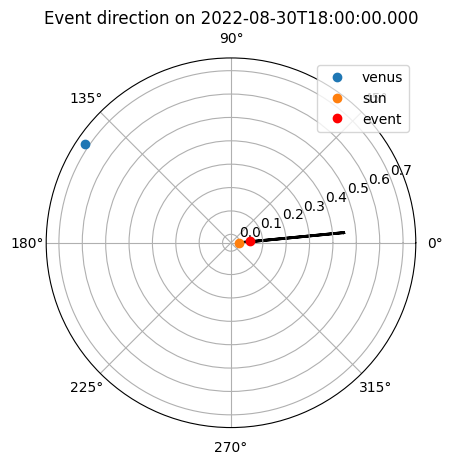

In [3]:
obstime = Time('2022-08-30T18:00:00')
planet_list = ['venus', 'sun']
planet_coord = [get_body_heliographic_stonyhurst(
    this_planet, time=obstime) for this_planet in planet_list]
event_coord = SkyCoord(855*u.arcsec, -482*u.arcsec,rsun=6695700.0*u.km , frame='helioprojective', observer='earth',obstime=obstime)
event_coord = event_coord.transform_to(frames.HeliographicStonyhurst) #only necessary if not in HGS
plt.figure()
plt.figure().add_subplot(projection='polar')
for this_planet, this_coord in zip(planet_list, planet_coord):
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=this_planet)
plt.plot(event_coord.lon.to('rad'), event_coord.radius, 'o', label='event',color='red')
plt.arrow(planet_coord[1].lon.to('rad').value,planet_coord[1].radius.value,event_coord.lon.to('rad').value,event_coord.radius.value*10,lw=2)
plt.legend(loc = 'upper right')
plt.title('Event direction on {}'.format(obstime))
plt.show()

<Figure size 640x480 with 0 Axes>

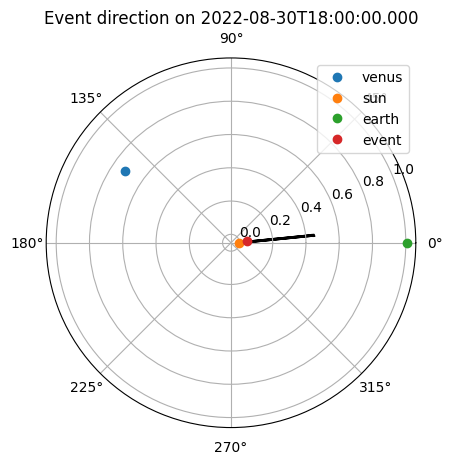

0

In [4]:
import functions
functions.plot_event_direction('2022-08-30T18:00:00',855,-482,'helioprojective')